###### **TEHREEM ZUBAIR**
## **BYTEWISE FELLOWSHIP**
## **TASK 20**
---
# **FEATURE ENGINEERING**
Feature engineering is a crucial step in the data science process that involves transforming raw data into meaningful inputs that improve the performance of machine learning models. 

We can understand feature engineering with the help of a simplae analogy:

- Imagine you are trying to predict the success of a recipe based on its ingredients.
- The raw data might include basic information like the type of ingredients, their quantities, and cooking time. 
- Feature engineering is like taking this raw information and creating new, more insightful pieces of information.
- For example, you might combine the ingredients to create a "flavor profile" or transform the cooking time into a category like "short", "medium", or "long".

In the context of machine learning the goal of feature engineering is:

**1. Feature Selection:** Identifying the most relevant features that contribute to the model's accuracy.

**2. Feature Transformation:** Applying mathematical transformations to features to improve the model's performance.

**3. Feature Creation:**Creating new features from existing data to provide more information to the model.


---
# **FEATURE SELECTION**
Feature selection is a crucial step in the data preprocessing phase of building a machine learning model. It involves selecting a subset of relevant features (predictors or independent variables) for use in model construction. The primary goals of feature selection are to improve model performance, reduce computational cost, and enhance model interpretability.

There are several methods of Feature selection which can be categorized into three types:
1. Filter Method
    1. Correlation Coefficient
    2. Chi-Square Test
    3. Variance Threshold
    4. Mutual Information
    5. ANOVA F-Value
2. Wrapper Method
    1. Forward Selection
    2. Backward Elimination
    3. Recursive Feature Elimination
3. Embedded Methods
    1. L1 Regression
    2. Decision Tree

We will discuss all the above methods one by one. Bur first import the libraries and the titanic dataset.

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
# **DATA PREPARATION**

In [338]:
titanic_data = pd.read_csv('/kaggle/input/titanic-dataset/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [339]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

From the above data we can see that it need some cleaning. First let's handle the missing values.

In [340]:
# Replacing missing age with the mean number
mean_age = titanic_data['Age'].mean()
titanic_data['Age'].fillna(mean_age, inplace = True)
titanic_data['Age'].astype(int)

/tmp/ipykernel_33/2493126969.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(mean_age, inplace = True)


0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [341]:
titanic_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [342]:
# Replacing missing with most occuring value
titanic_data['Embarked'].fillna('S', inplace = True)

/tmp/ipykernel_33/4024323139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna('S', inplace = True)


In [343]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Now we have another issue to to take care of. That is before doing any feature selection all of ou data should be in numerical form. But now two columns are not in numerical form. So we will done the label encoding of our data. By label encoding we mean is that we replace each category in a column by a numerical value. For example in the column Sex when we will do label encoding each gender will gain an number, let's say Female gets one and male gets 0. In this way our data is converted to numerical form.

We'll understand it in more detail when we are leraning to deal with categorical data.

In [344]:
# import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [345]:
# define an object of label encoder
le = LabelEncoder()

In [346]:
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

In [347]:
titanic_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# **SPLITTING DATA**
Now we will split our data in features and target.
First we need to define our features and target variable.
In this dataset our target variable is survived while our features are the reamining columns. As we are trying to predict whether the passneger survived or not based on the inforamtion from other columns. 

In [348]:
y_data = titanic_data['Survived']
X_data = titanic_data.drop(['Survived', 'PassengerId'], axis=1)
X_data


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


---
## **Correlation Coefficient**
The correlation coefficient is a statistical measure that calculates the strength and direction of the linear relationship between two variables. It is often denoted by the symbol 𝑟. The value of 𝑟 ranges from -1 to 1:

1. r = 1 indicates a perfect positive linear relationship.
2. r = −1 indicates a perfect negative linear relationship.
3. r = 0 indicates no linear relationship.

The Pearson correlation coefficient between two variables 𝑋 and 
𝑌 is calculated using the formula:

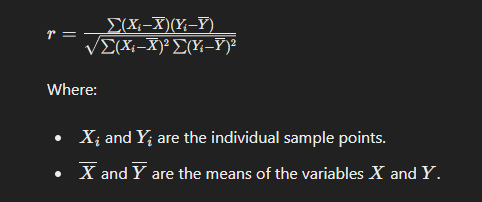


In python if we want to calculate correlation coefficient we can simply use the dataframes correlation method to get the matrix. For a better visualization make a heatmap of the correaltion matrix.

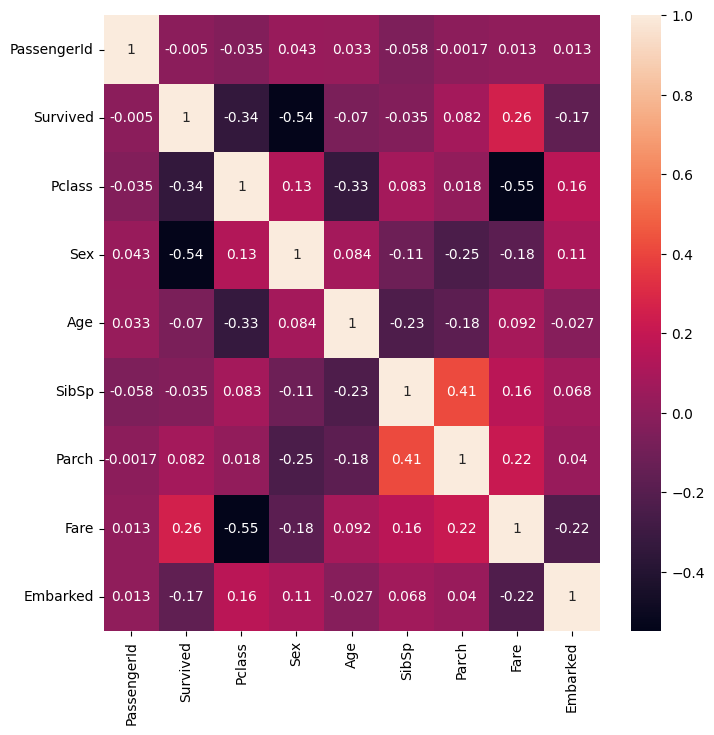

In [349]:
# Calculate correlation coefficients
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Based on the heatmap, the features that are more correlated with the target column **Survived** are:

1. **Sex**: Correlation coefficient of -0.54, indicating a strong negative correlation. This means that females (encoded as 0) had a higher survival rate compared to males (encoded as 1).

2. **Pclass**: Correlation coefficient of -0.34, indicating a moderate negative correlation. Passengers in higher classes (lower numerical values) had a higher survival rate.

3. **Fare**: Correlation coefficient of 0.26, indicating a moderate positive correlation. Passengers who paid higher fares had a higher survival rate.

These three features (Sex, Pclass, and Fare) are the most correlated with survival and would be important to consider when building a predictive model for survival on the Titanic.

---
## **Variance Threshold**
The Variance Threshold method is a simple feature selection technique that removes all features whose variance doesn't meet a certain threshold. The basic idea behind this method is that features with low variance are likely not to carry much information, and thus can be removed without much loss of data. Here's how it is calculated:

1. Calculate the Variance:
For each feature in the dataset, calculate the variance. The variance is a measure of how much the values of a feature differ from the mean of the feature. Mathematically, for a feature 𝑋 with 𝑛 samples, the variance 𝜎 is calculated as:

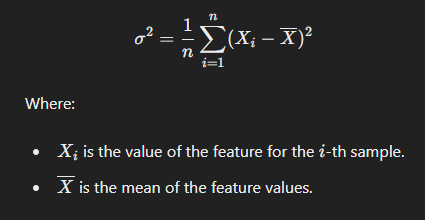

2. Compare with Threshold:
Compare the calculated variance of each feature with a predefined threshold value. If the variance of a feature is less than the threshold, that feature is considered low-variance and is removed from the dataset.

3. Select Features:
The remaining features, which have variances greater than or equal to the threshold, are selected for use in the model.

For calcualtion in python we will import Variance Threshld from sklearn feature_selection module.

In [350]:
from sklearn.feature_selection import VarianceThreshold

**Setting Threshold**
1. Low Variance Features: If you want to remove features that have very low variance (i.e., those that are almost constant), you might set a low threshold. For example, 0.01 or 0.1.

2. High Variance Features: If you want to keep only features with high variance, you might set a higher threshold.

In [351]:
X_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [352]:
VarThresh = VarianceThreshold(threshold = 6)
VarThresh.fit(X_data)
VarThresh.get_support()

array([False, False,  True, False, False,  True, False])

By setting a high variance threshold, we are essentially filtering out features that do not vary much across the dataset. In this case, only Age and Fare have enough variance to be considered useful features according to our threshold of 6.

---
## **Chi-Square Test**
The Chi-Square Test is a statistical method used to determine if there is a significant association between categorical variables. It's widely used in hypothesis testing, especially in fields such as social sciences, market research, and genetics, to analyze categorical data and understand relationships between different categories.

In [353]:
from sklearn.feature_selection import chi2, SelectPercentile

In [354]:
X_data = X_data.astype(int)

chi2_selector = SelectPercentile(chi2)
kBest = chi2_selector.fit_transform(X_data, y_data)

In [355]:
chi2_scores = pd.DataFrame(list(zip(X_data.columns, chi2_selector.scores_)), columns=['feature', 'score'])
chi2_scores

,feature,score
0,Pclass,30.873699
1,Sex,92.702447
2,Age,23.458444
3,SibSp,2.581865
4,Parch,10.097499
5,Fare,4585.962421
6,Embarked,10.202525


From the Chi-Square scores provided, we can conclude the following:

- Fare is the most significant feature in predicting the target variable, indicating a very strong relationship.
- Sex is also highly important, showing a very strong association with the target variable.
- Pclass has a strong association and is quite relevant for prediction.
- Age, Parch, and Embarked have moderate associations with the target, indicating some relevance for prediction.
- SibSp has the lowest association with the target variable among the features listed, suggesting it is less important for prediction.

## **ANOVA F-test**
ANOVA (Analysis of Variance) F-test is a statistical test used to determine whether there are significant differences between the means of two or more groups. 
- The F-test calculates the ratio of two variances: the variance between groups (due to differences between group means) and the variance within groups (due to differences within each group). 
- If the ratio is sufficiently large, it suggests that the differences between group means are unlikely to be due to random chance alone, indicating that at least one group mean is significantly different from the others. 
- ANOVA is widely used in experimental and observational studies across various fields to analyze group differences efficiently.

In [356]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [357]:
f_selector = SelectPercentile(f_classif)
kBest = f_selector.fit_transform(X_data, y_data)
f_selector.get_support()

array([False,  True, False, False, False, False, False])

In [358]:
f_scores = pd.DataFrame(list(zip(X_data.columns, f_selector.scores_)), columns=['feature', 'score'])
f_scores

,feature,score
0,Pclass,115.031272
1,Sex,372.405724
2,Age,4.106576
3,SibSp,1.110572
4,Parch,5.963464
5,Fare,63.122819
6,Embarked,25.717286


he features "Sex" and "Fare" have significantly higher F-test scores compared to the other features. This suggests that there are likely significant differences between groups (possibly categories within these features) with respect to their mean values.

---
## **Information Gain**
Information gain is a concept used in the context of decision trees and feature selection in machine learning and data mining. It measures the reduction in entropy or uncertainty after splitting a dataset based on a feature. 

In [359]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# INFO GAIN
feature_scores = mutual_info_classif(X_data, y_data, random_state=0)
feature_scores 

Features with the highest information gain scores (e.g., 0.13692572 for "Sex") are more influential in predicting the target variable.

Features with zero information gain (e.g., 0.0 for "Age" and "SibSp") suggest that these features do not contribute to distinguishing between classes in the target variable.

Features like "Pclass" and "Fare" also show moderate information gain scores (0.05301899 and 0.04985202, respectively), indicating they are reasonably important in predicting the target variable.

---
# **FEATURE TRANSFORMATION**
 Feature Transformation and scaling is one of the most crucial steps in building a Machine learning model. Too few features and your model won’t have much to learn from. Too many features and we might be feeding unnecessary information to the model. Not only this, but the values in each of the features need to be considered as well.
 
Oftentimes, we have datasets in which different columns have different units. 
- In our datset one column can be in years(age) and other column may be in dollars(fare). Also if their range is different like age has a range from 1-100 while fare has a range from 100-10000. Then how can we make sure that our model will treat both the features equally. 
- When we feed these features to our model there is a chance thtat the fare is influenced by the age.
- But this doesn’t necessarily mean it is more important as a predictor.
- So, to give importance to both Age, and Fare, we need feature scaling.

There are variuos types of feature transformation techniques. We will discuss them one by one.

---
## **MinMax Scaler**

The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1. The formula for calculating the scaled value is-

x_scaled = (x – x_min)/(x_max – x_min)

Thus, a point to note is that it does so for every feature separately. Though (0, 1) is the default range, we can define our range of max and min values as well.

We will first need to import it:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
titanic_data.astype(int)

In [ ]:
col_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']

In [ ]:
X_data_scaled = X_data.copy()
col_names = X_data.columns
features = X_data_scaled[col_names]

In [ ]:
# Stansardization
scaler = MinMaxScaler()
X_data_scaled[col_names] = scaler.fit_transform(features.values)
X_data_scaled.head()

We can see how the values were scaled. The minimum value among the columns became 0, and the maximum value was changed to 1, with other values in between. 

However, suppose we don’t want the features to have values like 0. Let us take the range to be (5, 10)

In [ ]:
scaler = MinMaxScaler(feature_range = (5, 10))

X_data_scaled[col_names] = scaler.fit_transform(features.values)

X_data_scaled.head()

---
## **Standard Scaler**
For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we

- Either choose a different scaler
- or first, convert the variables to a normal distribution and then apply this scaler

We will first import StandardScaler and then use it to transform our variable.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_data_scaled[col_names] = scaler.fit_transform(features.values)
X_data_scaled.head()

Let us check the mean and standard deviation of both the columns by performing a describe() function on df_scaled

In [ ]:
X_data_scaled.describe()

You will notice that the values are not exactly, but very close to 0(same with standard deviation). This occurs due to the numerical precision of floating-point numbers in Python.

---
## **MaxAbs Scaler**
MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]. 

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler = MaxAbsScaler()
X_data_scaled[col_names] = scaler.fit_transform(features.values)
X_data_scaled.head()

---
## **Robust Scaler**
If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

- Removes the median from the data
- Scales the data by the InterQuartile Range(IQR)

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

Now let us see how can we implement the Robust Scaler in python:

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler =  RobustScaler()
X_data_scaled[col_names] = scaler.fit_transform(features.values)
X_data_scaled.head()

---
## **Log Transform**
The log transformation machine learning is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Log operation had a dual role:

- Reducing the impact of too-low values
- Reducing the impact of too-high values.

In [ ]:
scaler =  RobustScaler()
X_data_scaled[col_names] = np.log(features.values)
X_data_scaled.head()

---
## **Unit Vector Scaler/Normalizer**
Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

- If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
- If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
scaler = Normalizer(norm = 'l1')
# norm = 'l2' is default

X_data_scaled[col_names] = scaler.fit_transform(features.values)
X_data_scaled.head()

---
# **FEATURE CREATION**
The goal of this task is to create new features from the existing data to enhance the dataset for further analysis or modeling. Feature engineering can reveal hidden patterns and relationships in the data, potentially improving the performance of machine learning models.

We can creates several new features in our dataframe. 
1. **FamilySize:** This feature helps in understanding the size of the travel group. Larger families might have different survival probabilities compared to individuals traveling alone.

2. **Age x Class:** This interaction term can capture the combined effect of age and class, which might be important for survival analysis.
3. **IsAlone:** This binary feature can indicate whether a passenger is alone or not, which can be a significant factor in survival.


In [ ]:
# Create FamilySize feature
X_data['FamilySize'] = X_data['SibSp'] + X_data['Parch'] + 1
X_data.head()


In [ ]:
# Create Age*Class feature
X_data['Age*Class'] = X_data['Age'] * X_data['Pclass']
# Create IsAlone feature
X_data['IsAlone'] = (X_data['FamilySize'] == 1).astype(int)

X_data.head()


These new features can provide additional insights and potentially improve the performance of predictive models.

---
# **PLOYNOMIAL FEATURES**
Polynomial features are an important aspect of feature engineering, especially when dealing with non-linear relationships in the data.We need polynomial features in Feature Engineering to:

1. Capture Non-Linear Relationships:
Polynomial features enable linear models to fit non-linear data by introducing higher-order and interaction terms.

2. Enhance Model Flexibility:
They increase the model's ability to fit complex patterns, potentially improving performance.

3. Model Complexity:
They allow for more complex models while using simple linear algorithms, capturing relationships like quadratic patterns.

To create polynomial features we will be using the Boston dataset. First we import the Polynomial Features from sklearn preprocessing modeule.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Load the Boston housing dataset
df = pd.read_csv('/kaggle/input/boston-housing/BostonHousing.csv')

In [ ]:
df.head()

Now let's separate target and featres columns.

In [ ]:
# Separate features and target
X = df.drop('medv', axis=1)
y = df['medv']

The formal defintion of Polynomial feature is given by:

`class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')[source]`

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Parameters:
1. degree, default=2
If a single int is given, it specifies the maximal degree of the polynomial features. If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum polynomial degree of the generated features.

2. interaction_only, default=False
If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:
    - included: x[0], x[1], x[0] * x[1], etc.
    - excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.

3. include_bias, default=True
If True (default), then include a bias column, the feature in which all polynomial powers are zero.

In [ ]:
# Instantiate the PolynomialFeatures class
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Fit and transform the feature matrix
X_poly = poly.fit_transform(X)

# Display the names of the new polynomial features
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
X_poly_df.head()

In [ ]:
# Polynomial features of degree 3
poly_degree_3 = PolynomialFeatures(degree=3)
X_poly_degree_3 = poly_degree_3.fit_transform(X)
X_poly_degree_3_df = pd.DataFrame(X_poly_degree_3, columns=poly_degree_3.get_feature_names_out(X.columns))
X_poly_degree_3_df.head()


---
# **HANDLING CATEGORICAL DATA**

Categorical variables are used to represent groups that are qualitative in nature. Some examples are colors, such as blue, red, black etc. or country of birth, such as Ireland, England or USA. While these can easily be understood by a human, we will need to encode categorical features as numeric values to use them in your machine learning models.


As an example, Suppse we have a table which consists of the country of residence of different respondents in the Stackoverflow survey. To get from qualitative inputs to quantitative features, one may naively think that assigning every category in a column a number would suffice, for example India could be 1, USA 2 etc. But these categories are unordered, so assigning this order may greatly penalize the effectiveness of your model. Thus, you cannot allocate arbitrary numbers to each category as that would imply some form of ordering in the categories.

Here I am using a responses dataset. I have removed some columns that we wont be needing for our demonstration. Also schecked all the categorical data.

In [389]:
responses = pd.read_csv('/kaggle/input/responses-data/Combined_DS_v10.csv')
responses.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [390]:
# drop unnecessary columns
responses.drop(['SurveyDate', 'StackOverflowJobsRecommend', 'VersionControl', 'ConvertedSalary'], axis=1, inplace = True)

In [391]:
# check missing values
responses.isnull().sum()

FormalEducation       0
Hobby                 0
Country               0
Age                   0
Years Experience      0
Gender              306
RawSalary           334
dtype: int64

In [392]:
responses['Gender'].value_counts()

Gender
Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: count, dtype: int64

For keeping things simple I am just taking two genders now i.e Male and Female and I am filling them in ration 2:1.

In [393]:
# Generate the replacement list with 600 'Male' and 399 'Female'
replacement = ['Male'] * 600 + ['Female'] * 399

# Shuffle the replacement list to randomize the assignment
np.random.shuffle(replacement)

# Assign the shuffled replacement list to the Gender column
responses['Gender'] = replacement
responses['Gender'].value_counts()

Gender
Male      600
Female    399
Name: count, dtype: int64

In [394]:
responses['RawSalary'] = pd.to_numeric(responses['RawSalary'].str.replace(',', ''), errors='coerce')
responses['RawSalary'].fillna(responses['RawSalary'].mean(), inplace = True)

/tmp/ipykernel_33/3067878702.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  responses['RawSalary'].fillna(responses['RawSalary'].mean(), inplace = True)


In [395]:
responses.isnull().sum()

FormalEducation     0
Hobby               0
Country             0
Age                 0
Years Experience    0
Gender              0
RawSalary           0
dtype: int64

In [396]:
# Assuming responses is your DataFrame
responses['FormalEducation'] = responses['FormalEducation'].replace({
    "Bachelor's degree (BA. BS. B.Eng.. etc.)": "Bachelor's",
    "Master's degree (MA. MS. M.Eng.. MBA. etc.)": "Master's",
    "Some college/university study without earning a degree": "Some college",
    "Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.)": "Secondary school",
    "Associate degree": "Associate",
    "Other doctoral degree (Ph.D. Ed.D.. etc.)": "Other doctoral",
    "Professional degree (JD. MD. etc.)": "Professional",
    "Primary/elementary school": "Primary",
    "I never completed any formal education": "None"
})

# Count the updated categories
responses['FormalEducation'].value_counts()

FormalEducation
Bachelor's          482
Master's            241
Some college        130
Secondary school     58
Associate            33
Other doctoral       30
Professional         19
Primary               5
None                  1
Name: count, dtype: int64

In [397]:
responses['Hobby'].value_counts()

Hobby
Yes    826
No     173
Name: count, dtype: int64

In [398]:
responses.head()

,FormalEducation,Hobby,Country,Age,Years Experience,Gender,RawSalary
0,Bachelor's,Yes,South Africa,21,13,Male,91752.614604
1,Bachelor's,Yes,Sweeden,38,9,Female,70841.000000
2,Bachelor's,No,Sweeden,45,11,Female,91752.614604
3,Some college,Yes,Sweeden,46,12,Male,21426.000000
4,Bachelor's,Yes,UK,39,7,Male,91752.614604


In [399]:
target = responses['RawSalary']
responses.drop('RawSalary', axis=1, inplace = True)

In [400]:
responses.head()

,FormalEducation,Hobby,Country,Age,Years Experience,Gender
0,Bachelor's,Yes,South Africa,21,13,Male
1,Bachelor's,Yes,Sweeden,38,9,Female
2,Bachelor's,No,Sweeden,45,11,Female
3,Some college,Yes,Sweeden,46,12,Male
4,Bachelor's,Yes,UK,39,7,Male


## **Label Encoding**
Converts each category value into a numerical value.

In [401]:
from sklearn.preprocessing import LabelEncoder

responses['FormalEducation'] = LabelEncoder().fit_transform(responses['FormalEducation'])
responses.head()

,FormalEducation,Hobby,Country,Age,Years Experience,Gender
0,1,Yes,South Africa,21,13,Male
1,1,Yes,Sweeden,38,9,Female
2,1,No,Sweeden,45,11,Female
3,8,Yes,Sweeden,46,12,Male
4,1,Yes,UK,39,7,Male


The categories have been encoded numerically from 0 to 8, where each unique category in FormalEducation has been assigned a unique integer.

## **One-Hot Encoding**
Converts each category value into a new column and assigns a 1 or 0 (True/False) value.

In [402]:
responses = pd.get_dummies(responses, columns=['Hobby'])
responses.head()

,FormalEducation,Country,Age,Years Experience,Gender,Hobby_No,Hobby_Yes
0,1,South Africa,21,13,Male,False,True
1,1,Sweeden,38,9,Female,False,True
2,1,Sweeden,45,11,Female,True,False
3,8,Sweeden,46,12,Male,False,True
4,1,UK,39,7,Male,False,True


## **Ordinal Encoding**
Converts categories into integer values based on their order.

In [403]:
from sklearn.preprocessing import OrdinalEncoder

responses['Country'] = OrdinalEncoder().fit_transform(responses[['Country']])
responses.head()

,FormalEducation,Country,Age,Years Experience,Gender,Hobby_No,Hobby_Yes
0,1,4.0,21,13,Male,False,True
1,1,6.0,38,9,Female,False,True
2,1,6.0,45,11,Female,True,False
3,8,6.0,46,12,Male,False,True
4,1,7.0,39,7,Male,False,True


## **Target Encoding**


In [404]:
from category_encoders import TargetEncoder
# Instantiate the TargetEncoder
encoder = TargetEncoder(cols=['Gender'])

# Fit and transform the data
responses['Gender_target_encoded'] = encoder.fit_transform(responses['Gender'], target)


In [405]:
responses.head()

,FormalEducation,Country,Age,Years Experience,Gender,Hobby_No,Hobby_Yes,Gender_target_encoded
0,1,4.0,21,13,Male,False,True,90659.092302
1,1,6.0,38,9,Female,False,True,93397.009044
2,1,6.0,45,11,Female,True,False,93397.009044
3,8,6.0,46,12,Male,False,True,90659.092302
4,1,7.0,39,7,Male,False,True,90659.092302


## **Binary Encoding**

Converts categories into binary numbers.


In [406]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder()
Gender_encoded = encoder.fit_transform(responses['Gender'])

In [408]:
Gender_encoded.head()

,Gender_0,Gender_1
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
